# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Lê Nguyễn Nhật Khánh
- MSSV: 23127206
- Lớp: 23CLC04

## Import các thư viện liên quan

In [1]:
import numpy as npy
import matplotlib.pyplot as plt
from PIL import Image

## Helper functions

In [2]:
def read_img(img_path):
    image_2D = Image.open(img_path).convert('RGB')
    return image_2D

def show_img(img_2d):
    plt.imshow(img_2d.astype(npy.uint8))
    plt.axis('off')
    plt.show()

def save_img(img_2d, img_path):
    extension_choice = int(input('\nChoose the extennsion of image:\n0. png\n1. pdf\nEnter your choice: '))
    exten = ''
    match extension_choice:
        case 0:
            exten = 'png'
        case 1: 
            exten = 'pdf'
        case _:
            print('Invalid choice')
            return
    file_path_final = img_path + '.' + exten
    print('\nSave image to path: ' + file_path_final)
    
    img = Image.fromarray(img_2d.astype(npy.uint8))
    img.save(file_path_final, exten.upper())

def convert_img_to_1d(img_2d):
    height, width, temp = img_2d.shape
    return npy.reshape(img_2d, (width * height, 3)).astype(int)

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    #take the length and the dim of every index
    n_pixels, dim = img_1d.shape
    
    #take the centroids for every situiation
    if init_centroids == 'random':
        #for making centroids without same
        max_loop = 20
        for lp in range(max_loop):
            candidates = npy.random.randint(0, 256, size = (k_clusters * 5, dim))
            centroids = npy.unique(candidates, axis = 0)

            if len(centroids) >= k_clusters:
                selected = npy.random.choice(len(centroids), size=k_clusters, replace = False)
                centroids = centroids[selected]
                break
    elif init_centroids == 'in_pixels':
        centroids = img_1d[npy.random.choice(n_pixels, size = k_clusters, replace = False)]
    
    #init the labels
    labels = npy.zeros(n_pixels)
    
    #loop
    while max_iter:
        #choose the centroids for every pixels
        m_img = npy.sum(img_1d ** 2, axis = 1).reshape(-1, 1)
        m_centroids = npy.sum(centroids ** 2, axis = 1).reshape(1, -1)
        m_img_centroids = npy.dot(img_1d, centroids.T)
        dist_squared = m_img + m_centroids - 2 * m_img_centroids
        labels = npy.argmin(dist_squared, axis = 1)

        #make a copy
        prev_centroids = centroids.copy()
        
        #update the new centroids
        for i in range(k_clusters):
            indices = npy.where(labels == i)[0]
            if len(indices) > 0:
                centroids[i] = img_1d[indices].mean(axis=0)
        #check if not change to much
        if npy.allclose(centroids, prev_centroids, atol=1e-3):
            break
        
        max_iter -= 1
    
    return centroids.astype(npy.uint8), labels

def generate_2d_img(img_2d_shape, centroids, labels):
    h, w, d = img_2d_shape
    flat_img = centroids[labels.astype(int)]
    image_final = flat_img.reshape((h, w, d))
    return image_final

## Your tests

In [3]:
# YOUR CODE HERE

## Main FUNCTION

In [4]:
def main():
    #take some information
    print('Example: /home/userA/Downloads/color_compression/photo.jpeg')
    print('Or just enter the name if the photo is the same level with this file.\nExample: photo.jpeg')
    image_path = input('\nEnter path of image: ')
    max_iter = int(input('\nEnter number of iterations: '))
    k_clusters = int(input('Enter number of clusters: '))
    init_centroids_choice = int(input('Choose how to init centroids:\n0. random\n1. in_pixels\nEnter your choice: '))

    init_centroids = ''
    #check the valid of init_centroids
    match init_centroids_choice:
        case 0:
            init_centroids = 'random'
        case 1:
            init_centroids = 'in_pixels'
        case _:
            print('Invalid value of init centroids.')
            return
        
    #load image and convert to 1D
    image_2d = read_img(image_path)
    image_2d_np = npy.array(image_2d)
    image_1d = convert_img_to_1d(image_2d_np)

    #kMeans
    centroids, labels = kmeans(image_1d, k_clusters, max_iter, init_centroids)
    
    #return to image
    image_final = generate_2d_img(image_2d_np.shape, centroids, labels)
    
    #show image
    show_img(image_2d_np)
    show_img(image_final)
    
    #get the path of outpput
    image_name_output = input('\nExample: photo\nEnter name of output image: ')
    image_path_output = input('\nExample: /home/userA/Downloads/color_compression\nEnter path of output image: ')
    image_path_output_final = image_path_output + '/' + image_name_output
    
    #save image to path
    save_img(image_final, image_path_output_final)

Example: /home/userA/Downloads/color_compression/photo.jpeg
Or just enter the name if the photo is the same level with this file.
Example: photo.jpeg



Enter path of image:  D:/Personal/23127206/test.jpeg

Enter number of iterations:  1000
Enter number of clusters:  7
Choose how to init centroids:
0. random
1. in_pixels
Enter your choice:  0


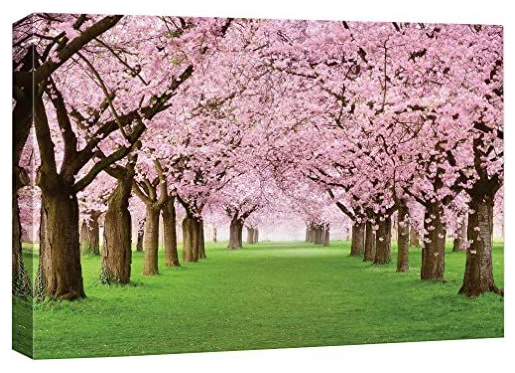

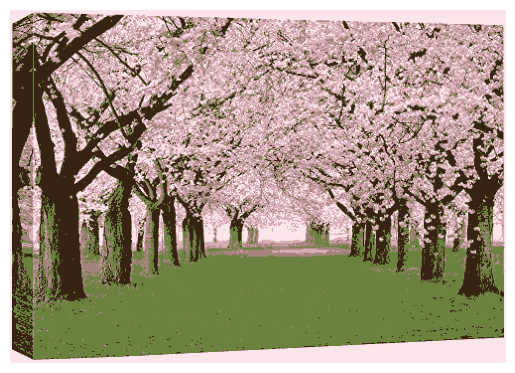

In [ ]:
main()